In [1]:
! git pull
import pandas as pd
import CCD_packages
import seaborn as sns
reload(CCD_packages)
%pylab inline

Already up-to-date.


/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



Populating the interactive namespace from numpy and matplotlib


In [11]:
timeseries_directory='/home/jmuraskin/Projects/CCD/working_v1/OnsetTS'
GroupDF,motionInfo=CCD_packages.getCCDSubjectData(saveMotionInfo=False)
goodsubj,badsubj = CCD_packages.getSubjectList(GroupDF=GroupDF,motionThresh=1,poor_performer=15)


No DR .txt file found or error for subject : CCD061
No DR .txt file found or error for subject : CCD061


In [29]:
fbNames=['noFeedback','Feedback']
ts=[]
for subj in goodsubj:
    if int(subj[-2:])<100:
        print 'Running Subject %s' % subj
        for fb in range(2):
            print 'Running %s' % fbNames[fb]
            fname='%s/%s_%s.txt' % (timeseries_directory,subj,fbNames[fb])
            df=pd.read_csv(fname,delim_whitespace=True,header=None,names=['TS'])
            df['subj']=subj
            df['fb']=fbNames[fb]
            if len(ts)>0:
                ts=pd.concat((ts,df))
            else:
                ts=df
ts['TR']=ts.index[:]

Running Subject CCD012
Running noFeedback
Running Feedback
Running Subject CCD014
Running noFeedback
Running Feedback
Running Subject CCD015
Running noFeedback
Running Feedback
Running Subject CCD016
Running noFeedback
Running Feedback
Running Subject CCD017
Running noFeedback
Running Feedback
Running Subject CCD018
Running noFeedback
Running Feedback
Running Subject CCD019
Running noFeedback
Running Feedback
Running Subject CCD020
Running noFeedback
Running Feedback
Running Subject CCD021
Running noFeedback
Running Feedback
Running Subject CCD022
Running noFeedback
Running Feedback
Running Subject CCD023
Running noFeedback
Running Feedback
Running Subject CCD024
Running noFeedback
Running Feedback
Running Subject CCD025
Running noFeedback
Running Feedback
Running Subject CCD026
Running noFeedback
Running Feedback
Running Subject CCD027
Running noFeedback
Running Feedback
Running Subject CCD031
Running noFeedback
Running Feedback
Running Subject CCD032
Running noFeedback
Running Feedba

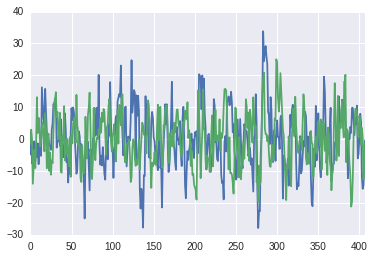

In [23]:
ts[np.all([ts.subj=='CCD012',ts.fb=='Feedback'],axis=0)].TS.plot()
ts[np.all([ts.subj=='CCD012',ts.fb=='noFeedback'],axis=0)].TS.plot()

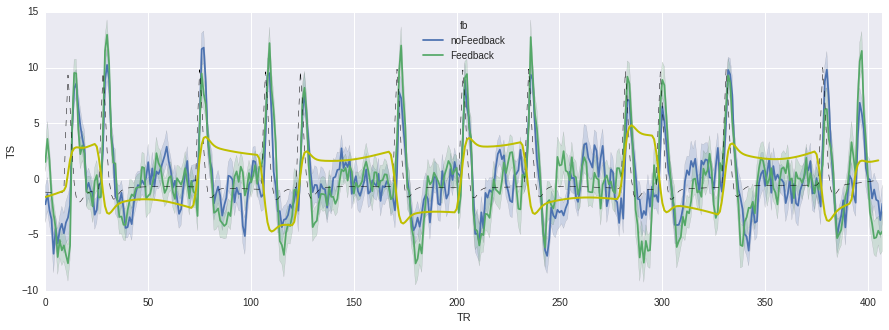

In [30]:
mat=pd.read_csv('/home/jmuraskin/Projects/CCD/working_v1/onset_feedback_run-0/feedback/_subject_id_CCD012/modelgen/mapflow/_modelgen0/run0.mat',header=5,delim_whitespace=True,names=['Focus','Wander','Focus-Onset','Wander-Onset','TR'])
plt.figure(figsize=(15,5))
ax=sns.tsplot(data=ts,time='TR',unit='subj',condition='fb',value='TS')
ax.plot((mat['Focus-Onset']+mat['Wander-Onset'])*500,'k--',linewidth=.5)
ax.plot((mat['Wander']-mat['Focus'])*3,'y-',linewidth=2)
